## Машинное обучение

## Практическое задание 2


# Часть 1. Numpy

### Задачи 1-6
__(2.4 балла)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.15 балла__, векторизованная – в __0.25 балла__.



* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.
 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  
* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.
 
 
* __Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow). __Обратите внимание, что в изображении может быть не три канала! За решения, явно или неявно использующие трёхканальность изображения будет присуждена половина баллов.__


* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).
 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

__Замечание.__ Можно считать, что все указанные объекты непустые (к примеру, в __задаче 1__ на диагонали матрицы есть ненулевые элементы) и корректные.

In [71]:
import numpy as np

In [94]:
#Задача 1 numpy векторизованная
x = [[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]
y = np.array(x)
a= y.diagonal()
a[a>0].prod()

3

In [97]:
#Задача 1 невекторизованная
x = [[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]
n = len(x) #строк
m =len (x[0]) #столбцов
k = 1
for i in range (0, n):
    for j in range (0, m):          
        if (i == j and x[i][j]!= 0):
            k= k * x[i][j];
            i = i + 1
            j = j+1
print (k)

3


In [98]:
#Задача 2 numpy векторизованная
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])
set (x)==set (y)

True

In [99]:
#Задача 2 невекторизованная
x = [1, 2, 2, 4]
y = [4, 2, 1, 2]
set (x)==set (y)

True

In [100]:
#Задача 3 numpy векторизованная
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print (x[1:][(x==0)[:-1]].max())

5


In [101]:
#Задача 3 невекторизованная
x = [6, 2, 0, 3, 0, 0, 5, 7, 0]
for i in range (1,len(x)):
    if (x[i] > max  and x[i - 1] == 0):
        max = x[i]
print (max)

5


In [ ]:
#Задача 4 numpy векторизованная
НЕВЫПОЛНЕНО

In [ ]:
#Задача 4 невекторизованная
НЕВЫПОЛНЕНО

In [102]:
#Задача 5 numpy векторизованная
x = np.array([2, 2, 2, 3, 3, 3, 5])
unique_array=np.unique(x,return_counts=True)
print(unique_array)

(array([2, 3, 5]), array([3, 3, 1], dtype=int64))


In [103]:
#Задача 5 невекторизованная
x = [2, 2, 2, 3, 3, 3, 5]
from itertools import groupby
def encode(a):
    return zip(*((key, len(tuple(group))) for key, group in groupby(a)))
print(tuple(encode(x)))

((2, 3, 5), (3, 3, 1))


In [ ]:
#Задача 6 numpy векторизованная
НЕВЫПОЛНЕНО

In [ ]:
#Задача 6 невекторизованная
НЕВЫПОЛНЕНО

In [104]:
import matplotlib.pyplot as plt
import numpy as np
def pairwise_distance(x, y):
    gramm_matrix = [ [0.0]*len(x) for _ in range(len(y)) ]
    for i in  range(len(x)):
        for j in range(len(y)):
            vec1 = x[i]
            vec2 = y[j]
            for k in range(len(vec1)):
                gramm_matrix[i][j] += (vec1[k] - vec2[k])**2
            gramm_matrix[i][j] = sqrt(gramm_matrix[i][j])
    return gramm_matrix

### Задача 7
__(1.6 балла)__  
Для каждой задачи сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib или plotly постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

<ipython-input-1-8d69a4dc03c6>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


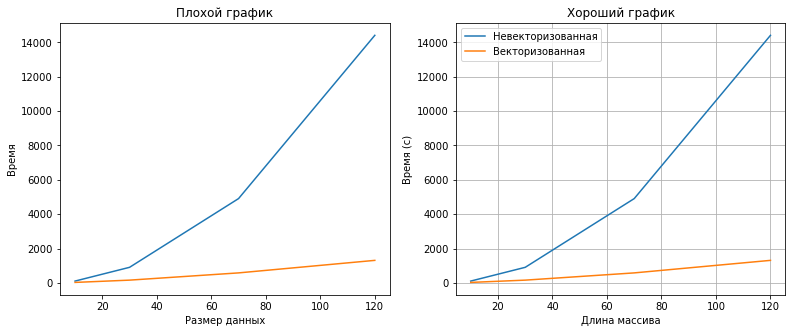

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

In [ ]:
# Your code here
# ...

---

# Часть 2. Линейная регрессия

In [2]:
%pylab inline

import seaborn as sns
sns.set(style="whitegrid")

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [4]:
def pairplot(df, target):
    ncol, nrow = 7, df.shape[1] // 7 + (df.shape[1] % 7 > 0)
    plt.figure(figsize=(ncol * 4, nrow * 4))

    for i, feature in enumerate(df.columns):
        plt.subplot(nrow, ncol, i + 1)
        plt.scatter(df[feature], target, s=10, marker='o', alpha=.6)
        plt.xlabel(feature)
        if i % ncol == 0:
            plt.ylabel('target')

В данном задании мы рассмотрим стандартный датасет для задачи регрессии Boston Housing, в котором необходимо предсказать стоимость недвижимости по 13 признакам.

Датасет достаточно просто загрузить из библиотеки scikit-learn:

In [5]:
data = datasets.load_boston()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y = data.target

In [6]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Разделим выборку на обучающую и тестовую в отношении 8/2:

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df, y, train_size=0.8, random_state=42)

__Задание 1.__ Обучение линейной регрессии.

**(0.5 балл)**

Обучите стандартную линейную регрессию, а также с $L_1$ и $L_2$ регуляризаторами (используйте параметры по умолчанию). Посчитайте метрику $R^2$ для каждого метода (метод score).

In [ ]:
#  Your code here
# ...

__Задание 2.__ Подбор гиперпараметров.

**(1 балл)**

Для Lasso- и Ridge-регресий подберите коэффициент регуляризации по обучающей выборке с помощью кросс-валидации. Параметры для перебора возьмите по логарифмической сетке от $10^{-6}$ до $10^6$).
Также посчитайте метрику $R^2$ для тестовой выборки и сравните с предыдущими результатами. Заметно ли изменилось качество?

Useful: GridSearchCV, RidgeCV, LassoCV

In [ ]:
#  Your code here
# ...

Постройте график зависимости $R^2$ для обучающей и тестовой (на кросс-валидации) выборок в зависимости от значения гиперпараметра. Для Lasso также постройте график зависимости количества ненулевых весов.

In [ ]:
#  Your code here
# ...

В какой момент происходит недообучение? Почему?

__Ответ__:

---

## Подготовка данных

Как вы могли заметить, большого прироста качества с помощью подбора коэфициента регуляризации добиться не удалось. Поэтому прежде чем бросаться обучать модели, необходимо изучить и предобработать данные.

__Задание 3.__ Масштабирование.

__(1 балл)__

Зачастую признаки в сырых данных имеют разный масштаб. Попробуйте применить масштабирование к данным, сравните качество. Заметно ли изменение?

Pipeline, StandardScaler, MinMaxScaler

In [ ]:
#  Your code here
# ...

Сравните оптимальное значение коэффициента регуляризации для Ridge-регрессии до и после масштабирования. Изменилось ли оно? Предположите, почему так могло произойти.

In [ ]:
#  Your code here
# ...

__Ответ:__

__Задание 4.__ Новые признаки.

__(1.5 балла)__

Полезным также бывает посмотреть как целевая переменная зависит от каждого признака.

In [ ]:
pairplot(x_train, y_train)

Обратите внимение на зависимость цены от признака LSTAT. Является ли эта зависимость линейной? А какой? Попробуйте выбрать преобразование для этого признака так, чтобы получившаяся зависимость была более линейной. Добейтесь $R^2$ на тестовой выборке не меньше 0.71.

__Ответ:__

Помимо преобразований отдельный признаков полезными бывают их попарные взаимодействия. Воспользуйтесь PolynomialFeatures, чтобы добавить попарные произведения и квадраты всех признаков. Обучите Ridge-регрессию (подберите гиперпараметр!) и посчитайте $R^2$ на тесте. Сильно ли изменилось качество?

In [ ]:
#  Your code here
# ...

__Задание 5.__ Оптимальная архитектура, анализ.

__(2 балла)__

При помощи `Pipeline` и `GridSearchSCV` выберите оптимальную архитектуру, комбинируя различные методы масштабирования, степень полинома в `PolynomialFeatures`, а также регуляризаторы. Для `Lasso` поставьте максимальное количество итераций больше значения по умолчанию, чтобы оптимизация сошлась.

In [ ]:
#  Your code here
# ...

Для одной комбинаций метода масштабирования и линейной регрессии постройте зависимость метрики $R^2$ на кросс-валидации (`GridSearchCV.cv_results_['mean_test_score']`) от значения параметра регуляризации для различных степеней полиномов в `PolynomialFeatures`.

In [ ]:
#  Your code here
# ...

При каких значениях происходит переобучение? А недообучение? Почему?

__Ответ:__